# Repaying the Credit
Gold Atlantis, a credit-providing firm, observed a rise in the number of defaulters.   
Now, the firm is only interested in those consumers who have a lower probability of becoming a defaulter.     
When Gold Atlantis reveives a credit application, it approves or disapproves the application based on the applicant's profile.      
However, there are two types of risks that are associated with the firm's decisions:
* If the applicant is likely to repay the loan, then disapproving the loan may result in a loss of business to the firm.   
* If the applicant is not likely to repay the loan, that is if the applicant is a defaulter, then approving the loan may lead to a financial loss to the firm.

### Gold Atlantis: Repaying the Credit
As an analyst, you need to analyse the credit data of Gold Atlantis, figure out various patterns in the data and make interpretations. The aim of this analysis is to help the firm identify those customers who have a lower probability of becoming a defaulter.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


#### Level 0: Understanding Data

In [3]:
data.shape

(100000, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [5]:
for col in data:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
GENDER
Car
House
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
DAYS_EMPLOYED
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [6]:
data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [7]:
def separate_data_types(data):
    Categorical = []
    Continuous = []
    
    for column in data.columns:
        if data[column].dtypes == object:
            Categorical.append(column)
        else:
            Continuous.append(column)
    return Categorical, Continuous
Categorical, Continuous = separate_data_types(data)

table = [Categorical, Continuous]
print(tabulate({'Categorical':Categorical, 'Continuous':Continuous}, headers=['Categorical', 'Continuous']))

Categorical          Continuous
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


In [8]:
#Another Approcach
a = data.select_dtypes(exclude = 'object')
b = data.select_dtypes(include = 'object')
alist = list(a.columns)
blist = list(b.columns)
print(tabulate({"Categorical":blist,
                "Continuous": alist}, headers = ["Categorical", "Continuous"]))

Categorical          Continuous
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


In [9]:
def info_of_cat(col):
    print(f"Unique values in {col} are: {data[col].unique()}")
    print(f"Mode of {col} is: {data[col].mode()[0]}")
    print(f"Total count of Missing Values of {col} are: {data[col].isnull().sum()}")

In [10]:
def info_of_num(col):
    print(f"The Mean of {col} is: {data[col].mean()}")
    print(f"The Median of {col} is: {data[col].median()}")
    print(f"The Mode of {col} is: {data[col].mode()[0]}")
    print(f"The Standard Deviation of the {col} is: {data[col].std()}")
    print(f"Number of Missing values of {col} is: {data[col].isnull().sum()}")

#### Level 1: Univariate Analysis

1. Univariate of 'TARGET' column

In [11]:
info_of_cat('TARGET')

Unique values in TARGET are: [1 0]
Mode of TARGET is: 0
Total count of Missing Values of TARGET are: 0


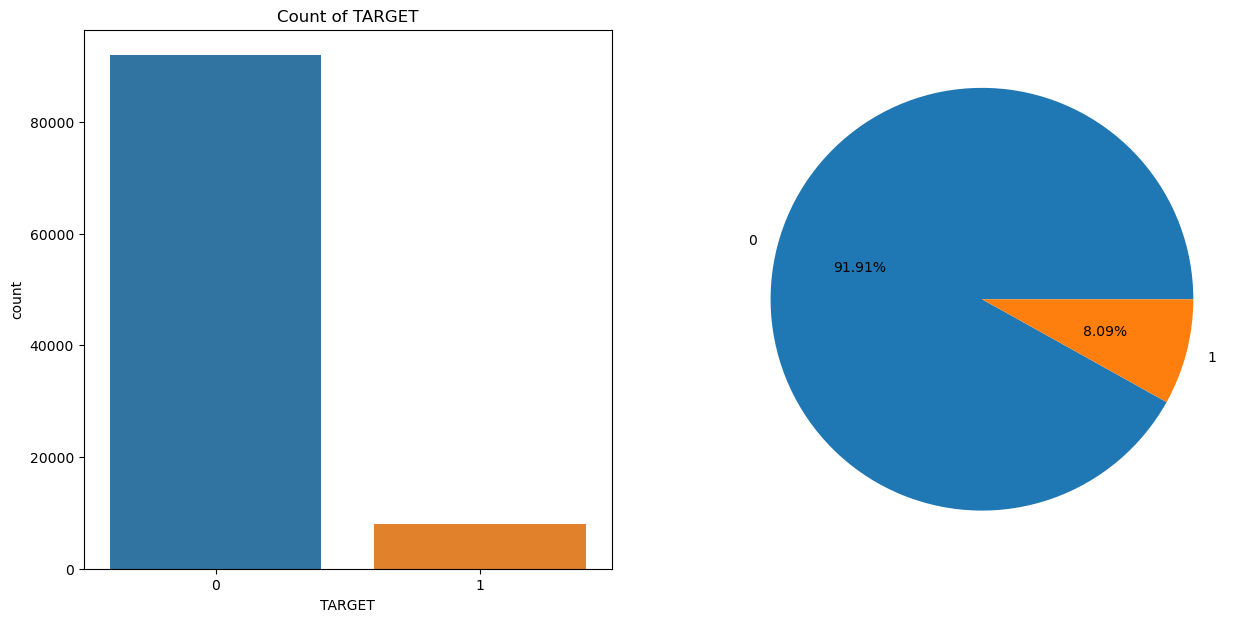

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Count of TARGET")
percentage = data['TARGET'].value_counts()
labels = list(data['TARGET'].value_counts().index)

sns.countplot(x=data['TARGET'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
The graph represents count of Defaulters and Non-defaulters clients.   
0 - Non-defaulters   
1 - Defaulters   
The count of Non-defaulters clients is high than Defaulters clients which is 92%.

2. Univariate of 'NAME_CONTRACT_TYPE' column

In [13]:
info_of_cat('NAME_CONTRACT_TYPE')

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is: Cash loans
Total count of Missing Values of NAME_CONTRACT_TYPE are: 0


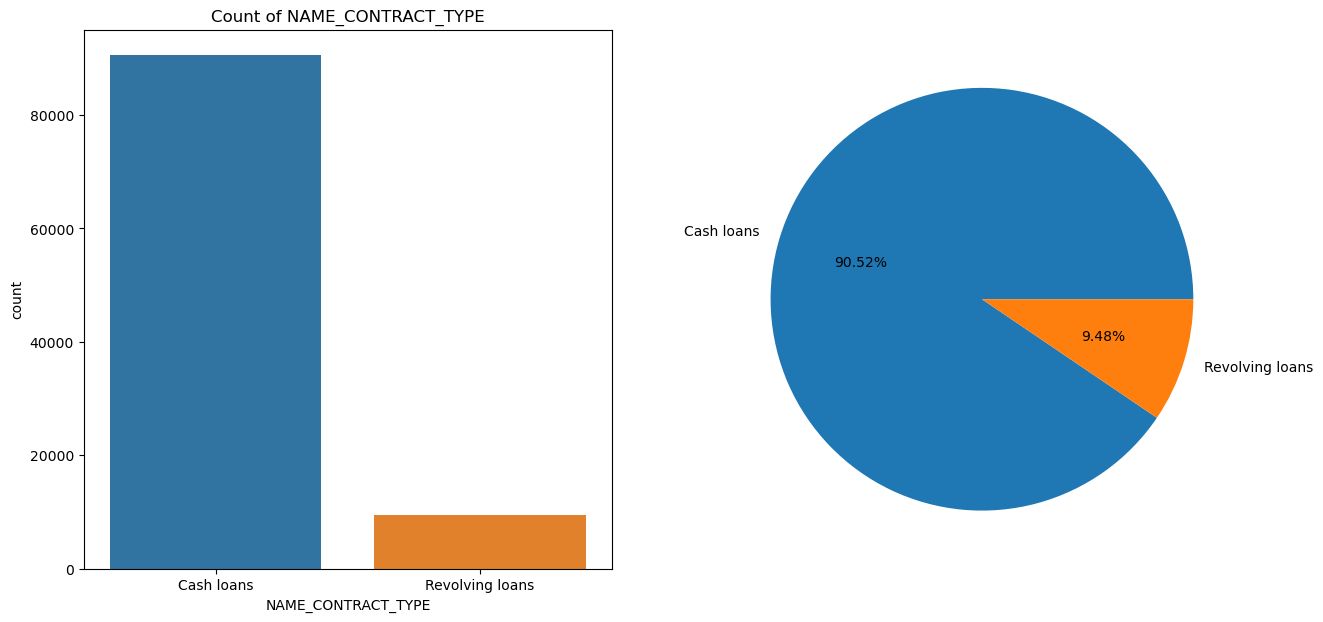

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Count of NAME_CONTRACT_TYPE")
percentage = data['NAME_CONTRACT_TYPE'].value_counts()
labels = list(data['NAME_CONTRACT_TYPE'].value_counts().index)

sns.countplot(x=data['NAME_CONTRACT_TYPE'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
The count of Cash Loans is high than Revolving Loans which is 90%.

3. Univariate of 'GENDER' column

In [15]:
info_of_cat('GENDER')

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is: F
Total count of Missing Values of GENDER are: 0


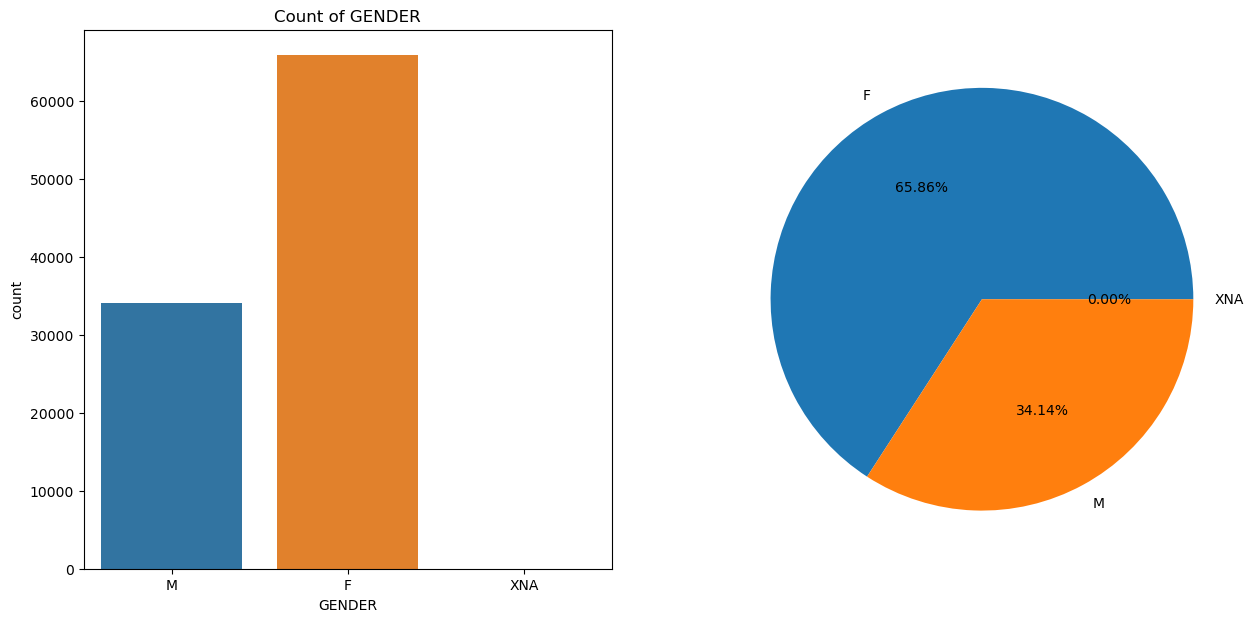

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Count of GENDER")
percentage = data['GENDER'].value_counts()
labels = list(data['GENDER'].value_counts().index)

sns.countplot(x=data['GENDER'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
Female count is high than Males.   
There is approx 30,000 more female clients as compared to Males.   

4. Univariate of 'NAME_INCOME_TYPE' column

In [17]:
info_of_cat('NAME_INCOME_TYPE')

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is: Working
Total count of Missing Values of NAME_INCOME_TYPE are: 0


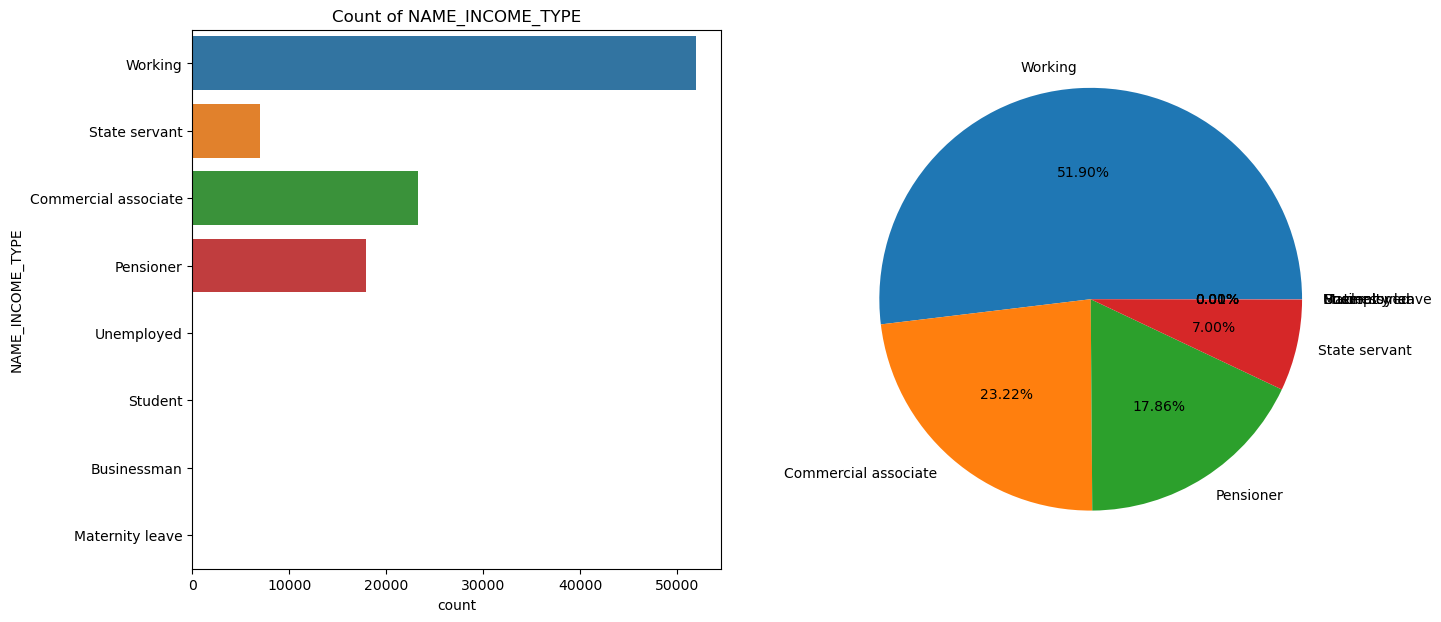

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Count of NAME_INCOME_TYPE")
percentage = data['NAME_INCOME_TYPE'].value_counts()
labels = list(data['NAME_INCOME_TYPE'].value_counts().index)

sns.countplot(y=data['NAME_INCOME_TYPE'], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%.2f%%")
plt.show()

__Interpretation :__   
Working Income type has the highest count than others which is 52%.   
Commecial Asssociate has 2nd highest count which is 23%.

5. Univariate of 'NAME_EDUCATION_TYPE' column

In [19]:
info_of_cat('NAME_EDUCATION_TYPE')

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is: Secondary / secondary special
Total count of Missing Values of NAME_EDUCATION_TYPE are: 0


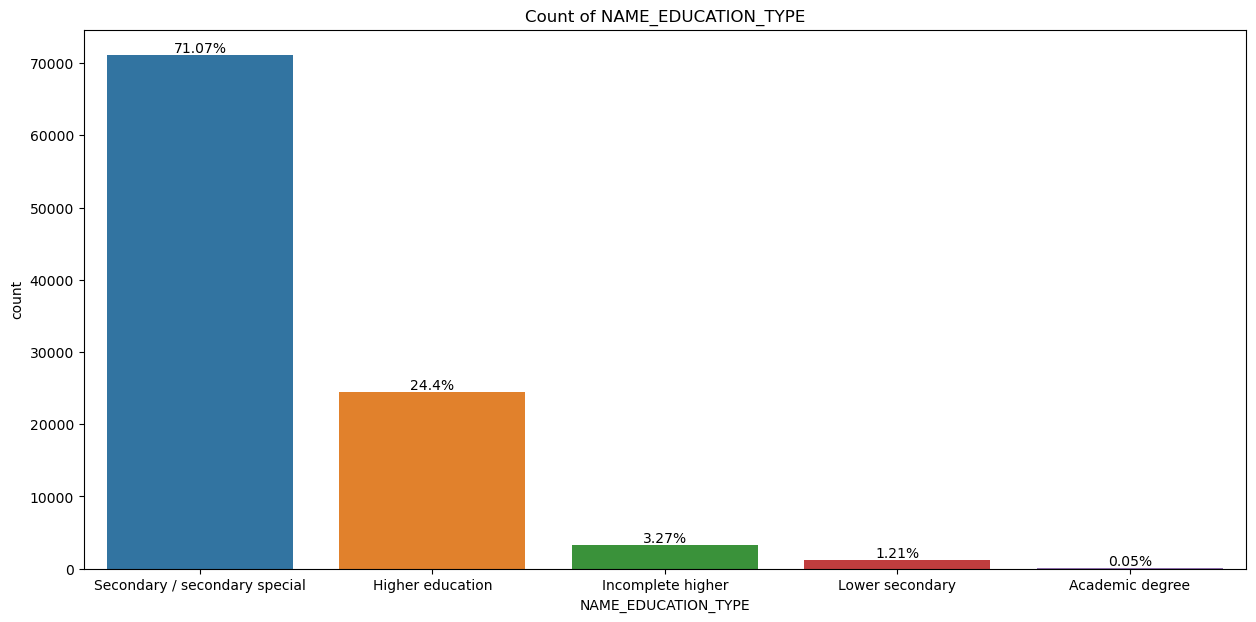

In [20]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["NAME_EDUCATION_TYPE"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Count of NAME_EDUCATION_TYPE")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
The count of Seconday/Seconday Special education is high than other educations.    
71% of clients completed their Secondary Education.   
While 24% clients completed their Higher Education.   

6. Univariate of 'OCCUPATION_TYPE' column

In [21]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is: Laborers
Total count of Missing Values of OCCUPATION_TYPE are: 31224


In [22]:
O_mode = data['OCCUPATION_TYPE'].mode()[0]
data['OCCUPATION_TYPE'].fillna(O_mode, inplace=True)

In [23]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is: Laborers
Total count of Missing Values of OCCUPATION_TYPE are: 0


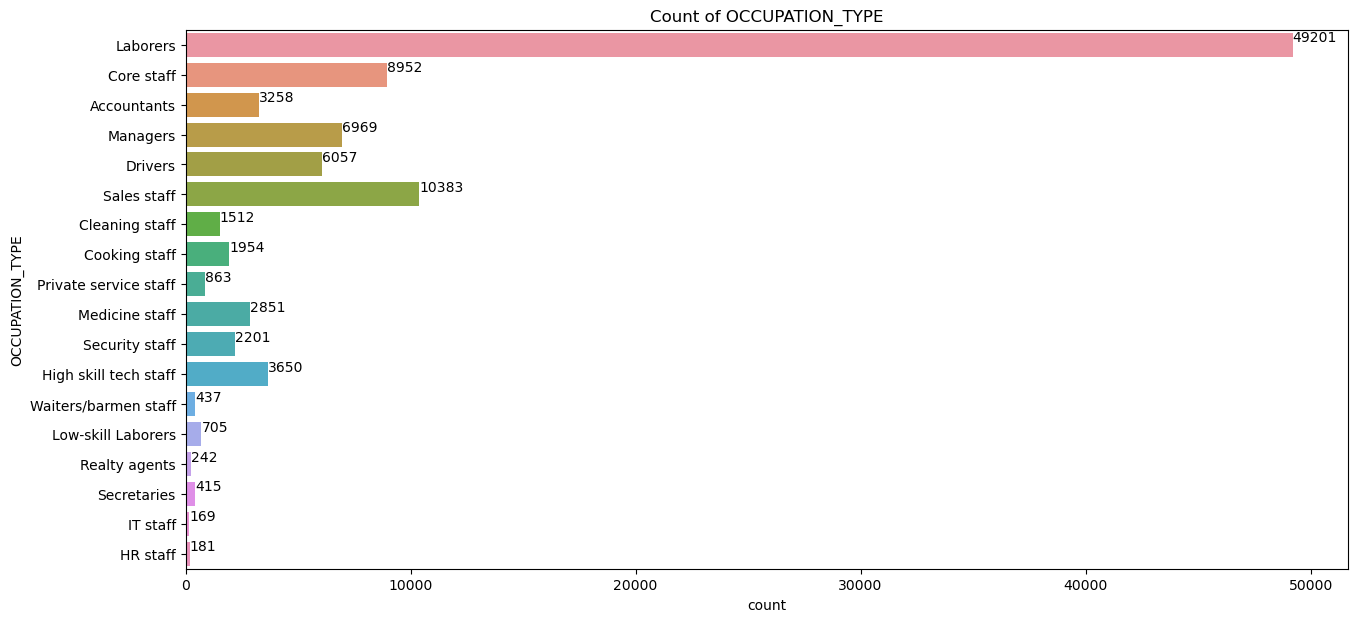

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.countplot(y = data['OCCUPATION_TYPE'])
for bar in ax.patches:
        ax.set_title("Count of OCCUPATION_TYPE")
        values = bar.get_width()
        y = bar.get_y()+bar.get_height()/2
        x = bar.get_width()
        ax.annotate(values,(x,y),va="bottom",ha="left")
plt.show()

__Interpretation :__   
People have various Occupations.   
The count of Laborers is high which is 49201.    

7. Univariate of 'TOTAL_DOC_SUBMITTED' column

In [25]:
info_of_num('TOTAL_DOC_SUBMITTED')

The Mean of TOTAL_DOC_SUBMITTED is: 0.93121
The Median of TOTAL_DOC_SUBMITTED is: 1.0
The Mode of TOTAL_DOC_SUBMITTED is: 1
The Standard Deviation of the TOTAL_DOC_SUBMITTED is: 0.3439173137416586
Number of Missing values of TOTAL_DOC_SUBMITTED is: 0


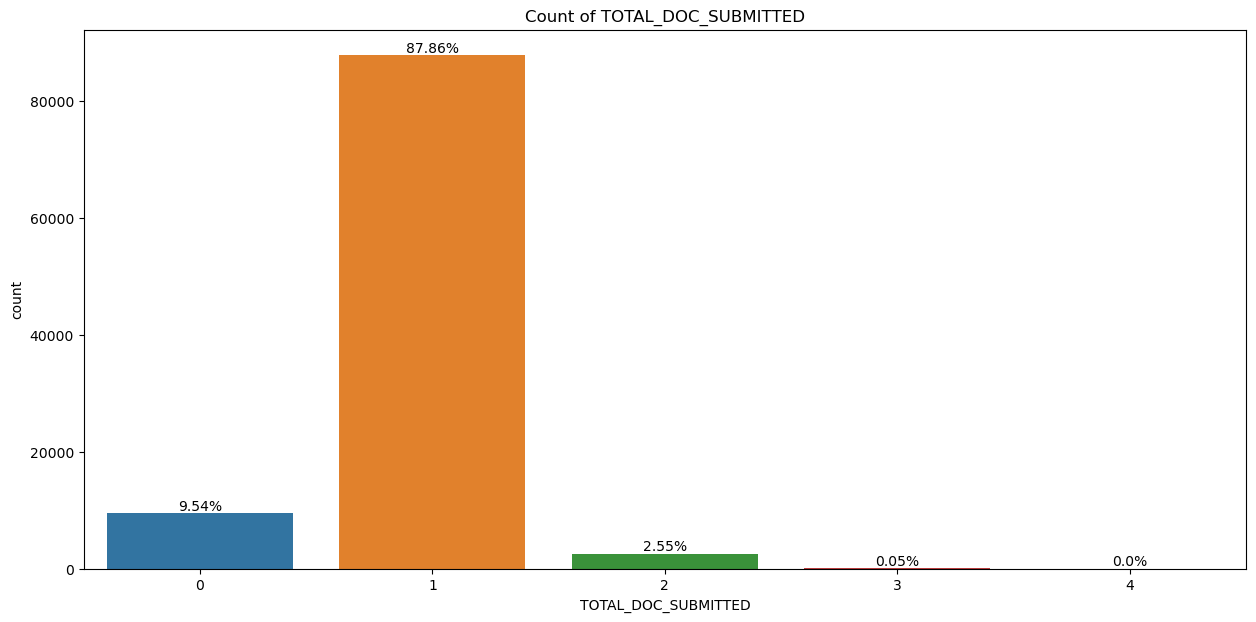

In [26]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["TOTAL_DOC_SUBMITTED"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Count of TOTAL_DOC_SUBMITTED")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
88% clients submitted only 1 document which is high submission as compare to other.   
10% clients not submitted any documents.

#### Heat Map for Analysis

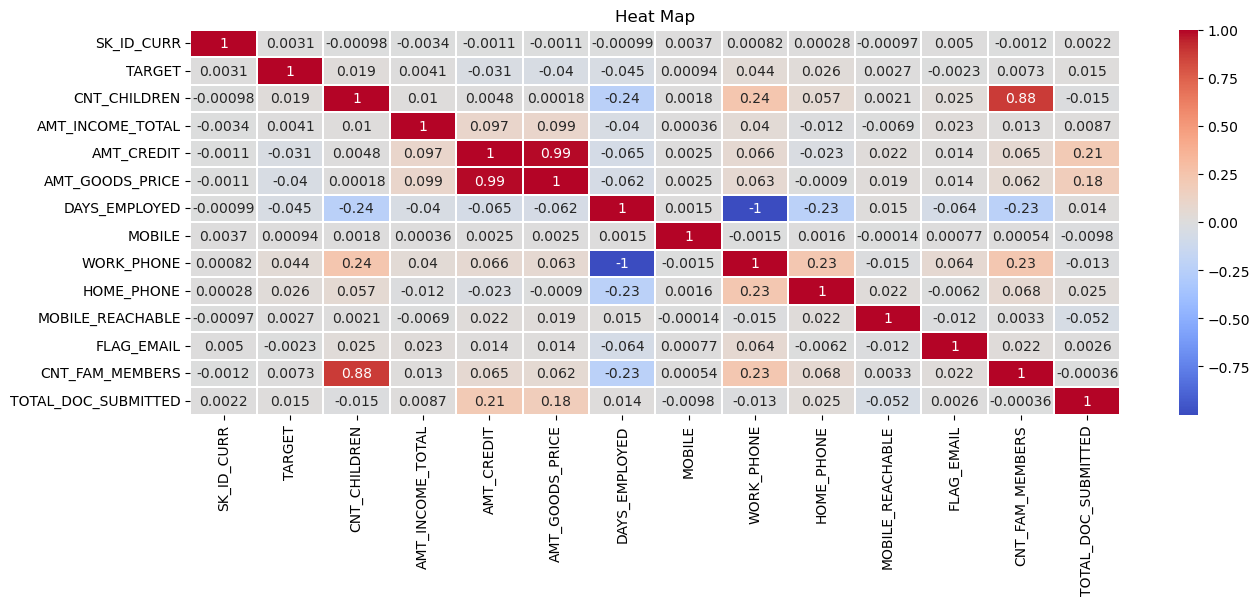

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), cbar=True, linewidths=0.1, annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

__Interpretation :__   
1. Heat Map shows how columns are Co-related with each other.
2. The bright Red colour denotes Strong Positive Co-relation while Dark Blue colour denotes Strong Negative Co-relation.
3. Count of Children and Count of Family Members columns are Positively Co-related. (Corr. = 0.88)
4. Credit Amount is Strongly Positive Co-related with Goods Price Amount. (Corr. = 0.99)
5. Work_Phone column is Strongly Negative Co-related with Days Employed column. (Corr. = -1)

#### Level 2: Bivariate Analysis

1. Target vs Gender

In [28]:
df = data[data.GENDER != 'XNA']

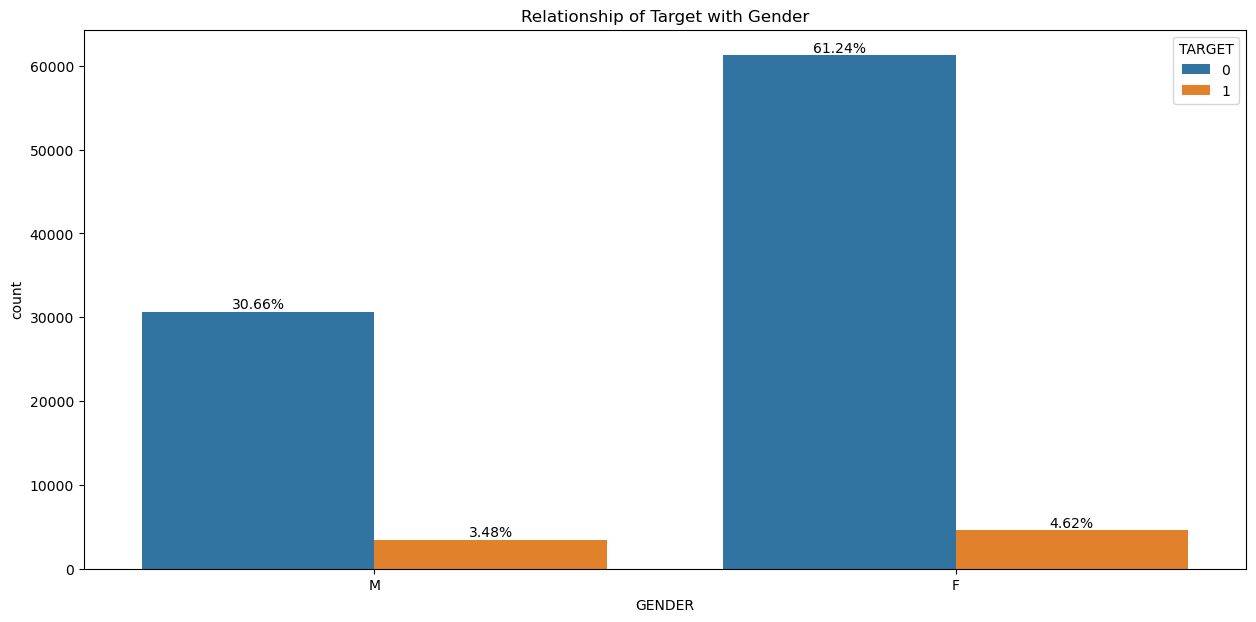

In [29]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = df["GENDER"], hue = df['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Relationship of Target with Gender")
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"   # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
Total 65% are females and 35% are Male clients are there with Status as either Defaulter or Non-defaulter.   
Female clients have high Non-defaulters than Males which is 61%.   
Also Females clients have high Defaulters than Males which is 4%.

2. Target vs NAME_CONTRACT_TYPE

In [30]:
info_of_cat('NAME_CONTRACT_TYPE')

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is: Cash loans
Total count of Missing Values of NAME_CONTRACT_TYPE are: 0


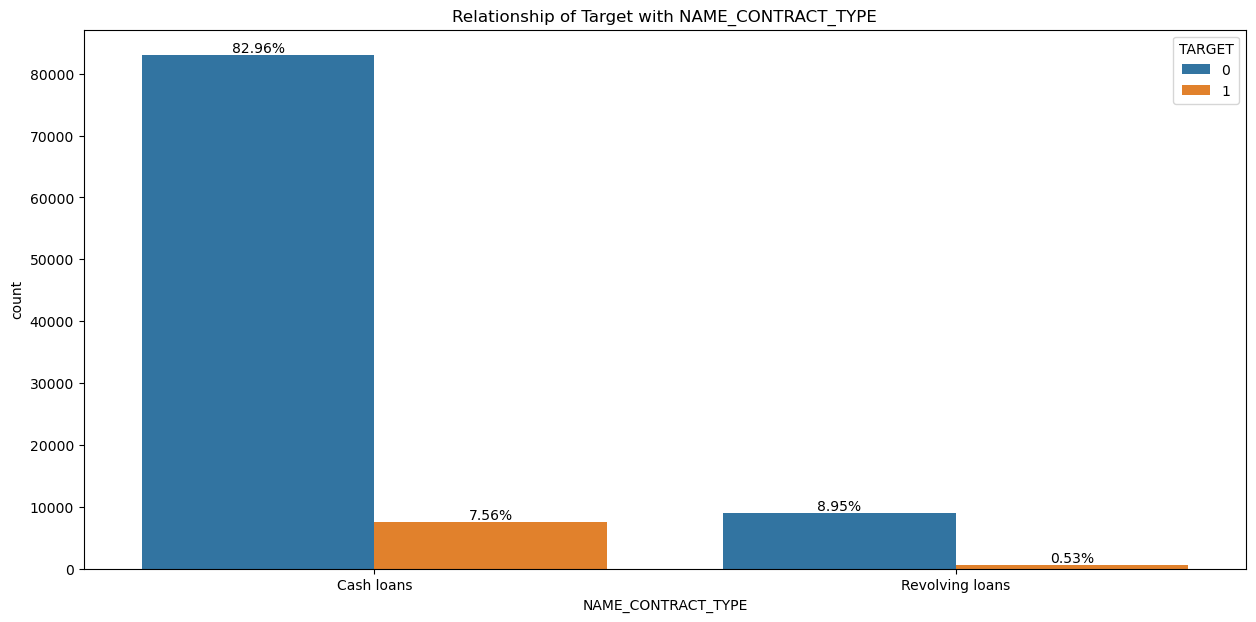

In [31]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["NAME_CONTRACT_TYPE"], hue = data['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Relationship of Target with NAME_CONTRACT_TYPE")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
Cash loans are high than Revolving loans which is 90%.   
Cash loans has high number of Non-defaulters.   
Also Cash loans has high number of Defaulters count than Revolving Loans.

3. Target vs Car

In [32]:
info_of_cat('Car')

Unique values in Car are: ['N' 'Y']
Mode of Car is: N
Total count of Missing Values of Car are: 0


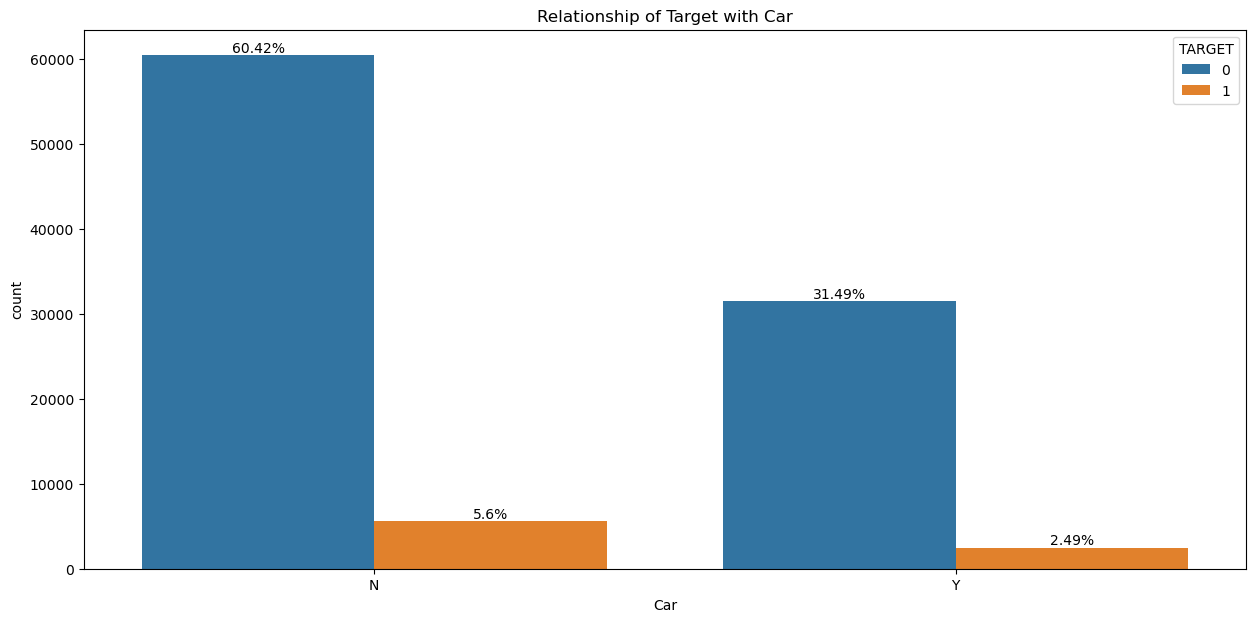

In [33]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["Car"], hue = data['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Relationship of Target with Car")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
1. Maximum Defaulter and Non-defaulter clients do not have any Car.   
2. Non-Defaulters clients are high for both Yes and No than Defaulters but for clients who Not having Car are high Non-defaulters than clients who have Car.

4. Target vs House

In [34]:
info_of_cat('House')

Unique values in House are: ['Y' 'N']
Mode of House is: Y
Total count of Missing Values of House are: 0


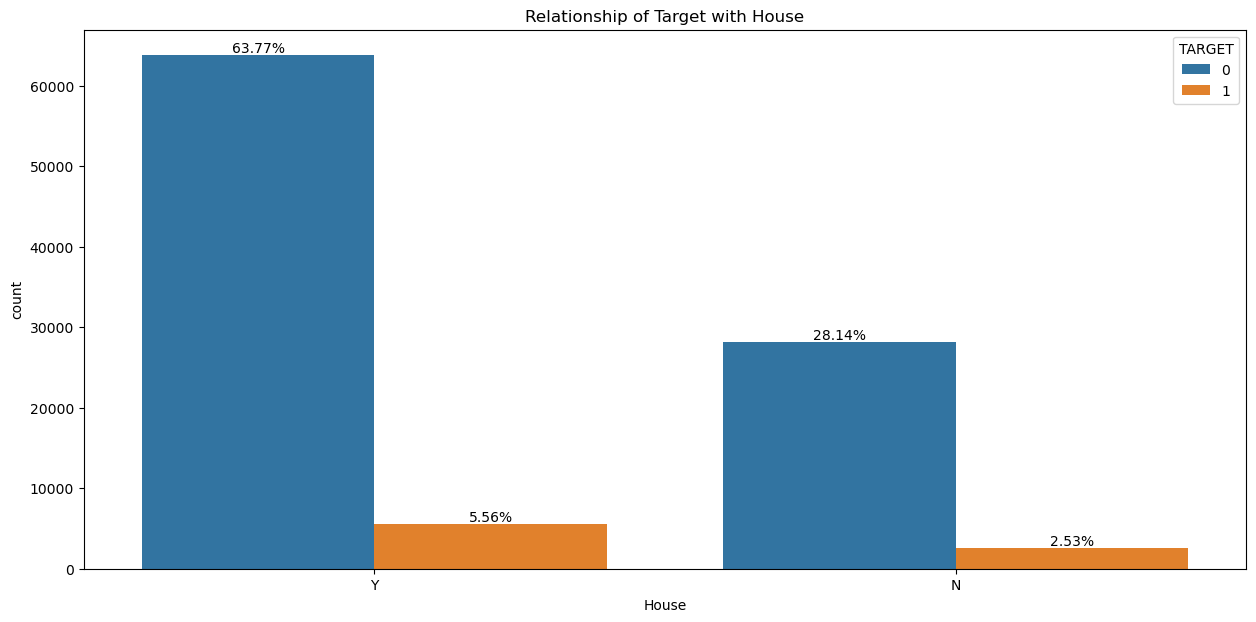

In [35]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["House"], hue = data['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Relationship of Target with House")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
1. 63% Non-defaulter clients have their own House which is high as compare to clients who not have their own House.   
2. Non-defaulter clients are high count for both Yes and No.   
Yes - Have own House   
No - Not have own House

5. Target vs Name_Income_Type

In [36]:
info_of_cat('NAME_INCOME_TYPE')

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is: Working
Total count of Missing Values of NAME_INCOME_TYPE are: 0


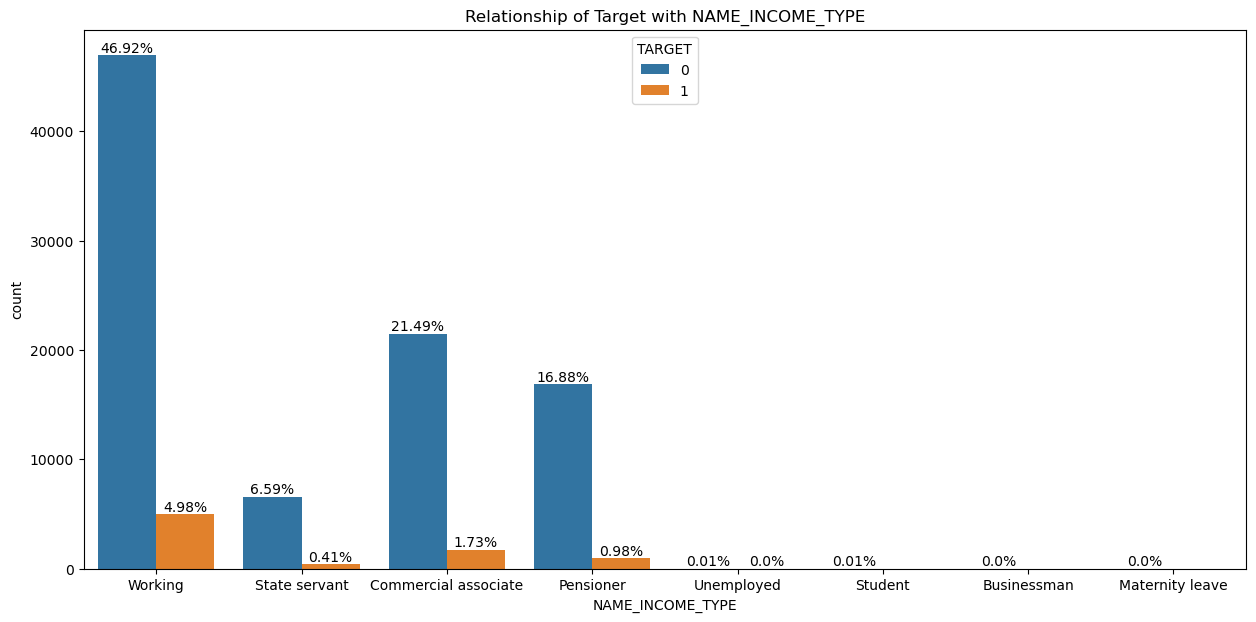

In [37]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["NAME_INCOME_TYPE"], hue = data['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Relationship of Target with NAME_INCOME_TYPE")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
1. Working Income type is high and have both Non-defaulters and Defaulters clients.   
2. 47% Working clients are Non-defaulters.   
3. Commercial Associate has 2nd maximum Non-defaulter clients which is 21% who applied for loan.

6. Target vs Name_Education_Type

In [38]:
info_of_cat('NAME_EDUCATION_TYPE')

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is: Secondary / secondary special
Total count of Missing Values of NAME_EDUCATION_TYPE are: 0


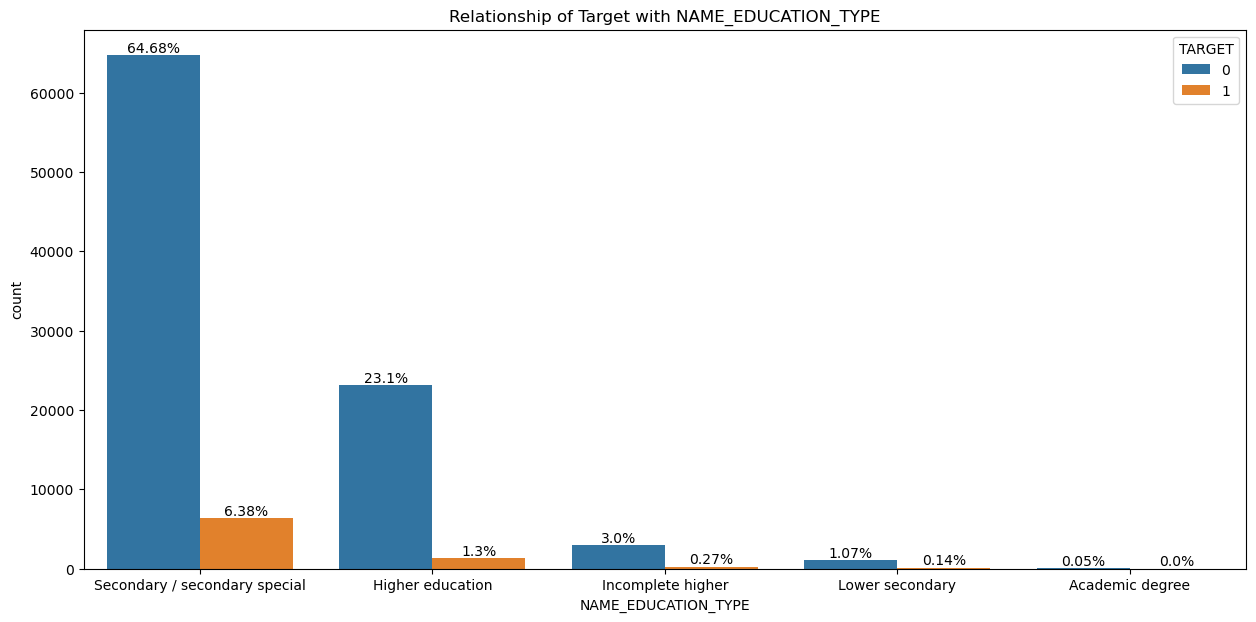

In [39]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["NAME_EDUCATION_TYPE"], hue = data['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Relationship of Target with NAME_EDUCATION_TYPE")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
1. 70% clients completed their Seconday/Seconday Special education which has highest count than other educations, in which 64% are Non-defaulter clients and 6% are Defaulter clients.   
2. While 24% clients completed their Higher Education which is 2nd highest than other educations.

7. Target vs NAME_FAMILY_STATUS

In [40]:
info_of_cat('NAME_FAMILY_STATUS')

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is: Married
Total count of Missing Values of NAME_FAMILY_STATUS are: 0


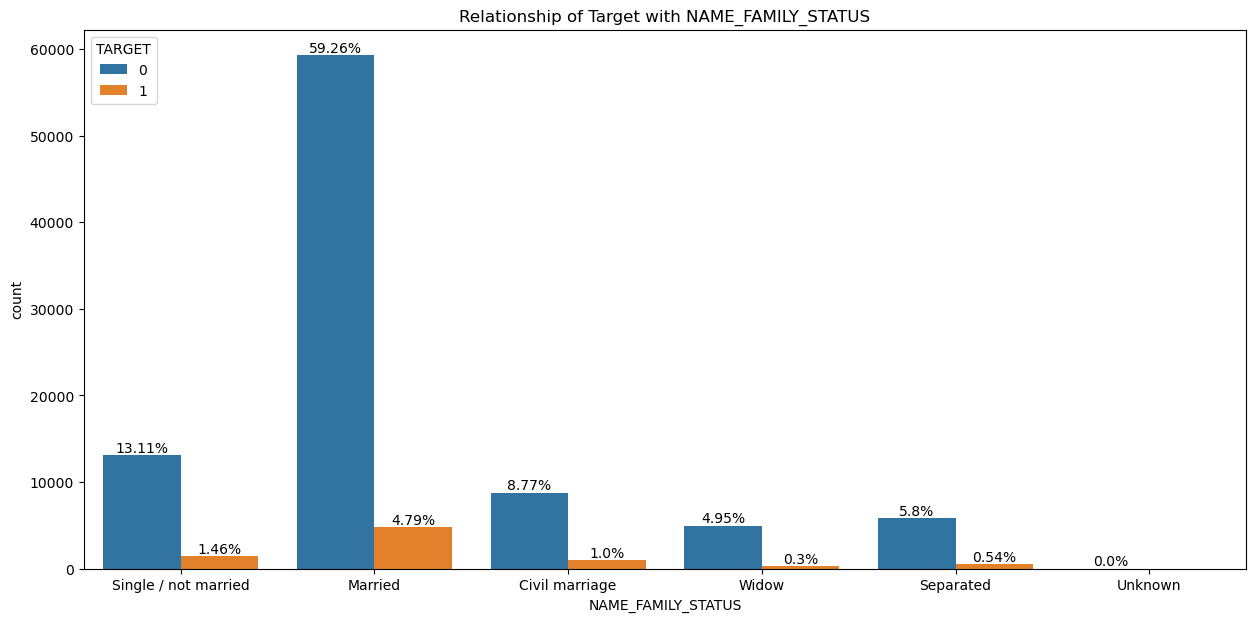

In [41]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = data["NAME_FAMILY_STATUS"], hue = data['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Relationship of Target with NAME_FAMILY_STATUS")
    percentage = f"{round(bar.get_height() /len(data)*100, 2)}%"    # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
Married clients are high for both Defaulters and Non-defaulters.   
In which, Non-defaulter Married clients are maximum than Defaulters.

8. Target vs OCCUPATION_TYPE

In [42]:
info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is: Laborers
Total count of Missing Values of OCCUPATION_TYPE are: 0


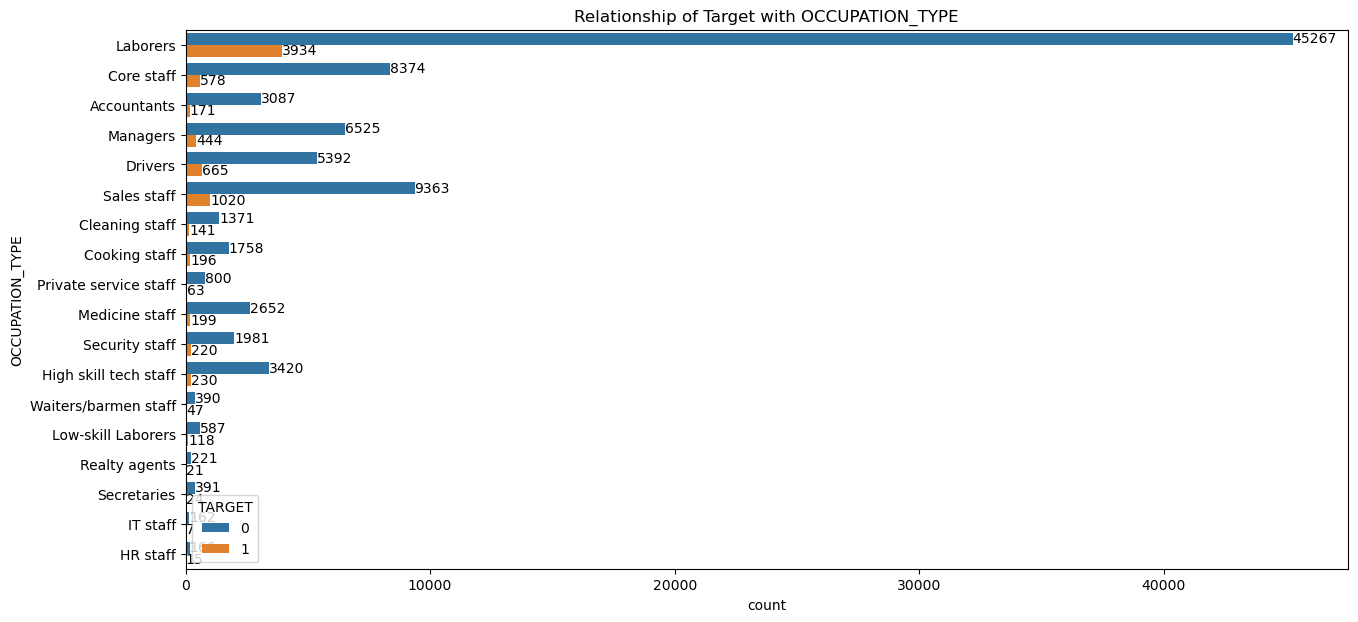

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.countplot(y = data['OCCUPATION_TYPE'], hue = data['TARGET'])
for bar in ax.patches:
        ax.set_title("Relationship of Target with OCCUPATION_TYPE")
        values = bar.get_width()
        y = bar.get_y()+bar.get_height()/2
        x = bar.get_width()
        ax.annotate(values,(x,y),va="center",ha="left")
plt.show()

__Interpretation :__   
1. Occupation type Laborers is high for Defaulter and Non-defaulters.   
2. Non-defaulter clients are high which are 45267 and Defaulters are 3934.
3. Sales staff and Core staff occupation clients are 2nd high for Non-defaulters.

9. Target vs AMT_INCOME_TOTAL

In [44]:
info_of_num('AMT_INCOME_TOTAL')

The Mean of AMT_INCOME_TOTAL is: 169426.07027325002
The Median of AMT_INCOME_TOTAL is: 144000.0
The Mode of AMT_INCOME_TOTAL is: 135000.0
The Standard Deviation of the AMT_INCOME_TOTAL is: 383500.74427718896
Number of Missing values of AMT_INCOME_TOTAL is: 0


In [45]:
data.AMT_INCOME_TOTAL.max()

117000000.0

In [46]:
data.AMT_INCOME_TOTAL.min()

25650.0

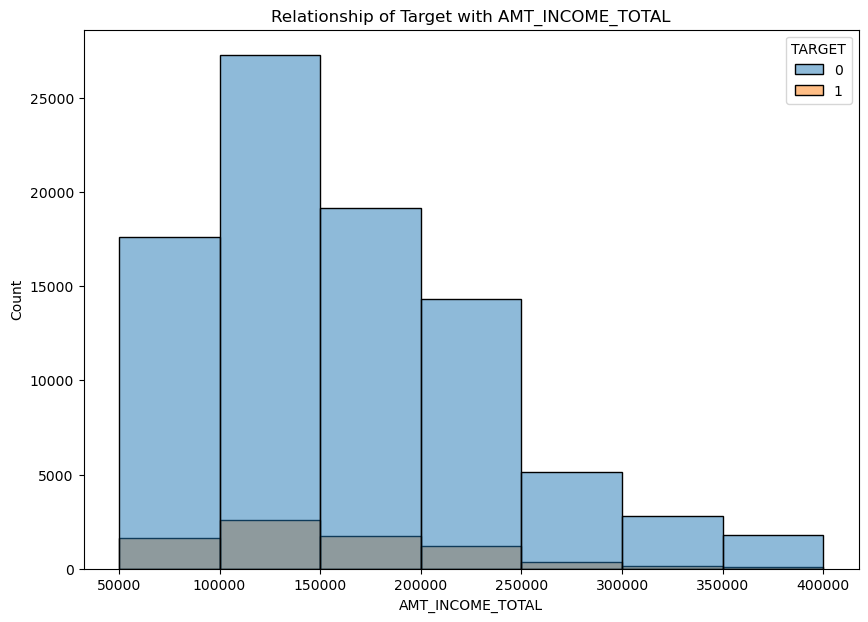

In [47]:
fig, ax = plt.subplots(figsize=(10,7))
bins = [50000,100000,150000,200000,250000,300000,350000,400000]
sns.histplot(x='AMT_INCOME_TOTAL', hue='TARGET', data=data, bins=bins)
plt.title('Relationship of Target with AMT_INCOME_TOTAL')
plt.show()

__Interpretation :__   
Defaulter and Non-defaulter clients have Total Income in between 50k-4 lakh.    
Maximum Non-defaulter clients have Income in between 1-1.5 lakh.

11. Target vs DAYS_EMPLOYED

In [48]:
info_of_num('DAYS_EMPLOYED')

The Mean of DAYS_EMPLOYED is: 67209.10184
The Median of DAYS_EMPLOYED is: 2203.0
The Mode of DAYS_EMPLOYED is: 365243
The Standard Deviation of the DAYS_EMPLOYED is: 139013.1548665735
Number of Missing values of DAYS_EMPLOYED is: 0


In [49]:
data.DAYS_EMPLOYED.max()

365243

In [50]:
data.DAYS_EMPLOYED.min()

0

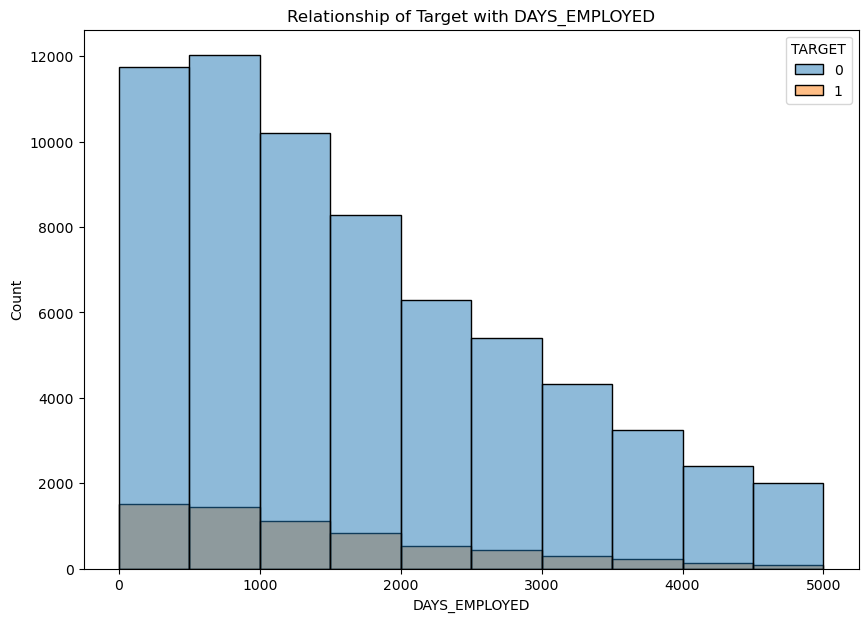

In [51]:
fig, ax = plt.subplots(figsize=(10,7))
bins = np.arange(0,5500,500)
sns.histplot(x='DAYS_EMPLOYED', hue='TARGET', data=data, bins=bins)
plt.title('Relationship of Target with DAYS_EMPLOYED')
plt.show()

__Interpretation :__   
Graph shows Right skewed.   
Number of Non-defaulter clients are high and Days employed is high in between 500-1000 days.

12. CNT_CHILDREN vs CNT_FAM_MEMBERS

In [52]:
info_of_num('CNT_CHILDREN')

The Mean of CNT_CHILDREN is: 0.41739
The Median of CNT_CHILDREN is: 0.0
The Mode of CNT_CHILDREN is: 0
The Standard Deviation of the CNT_CHILDREN is: 0.7210137214425809
Number of Missing values of CNT_CHILDREN is: 0


In [53]:
info_of_num('CNT_FAM_MEMBERS')

The Mean of CNT_FAM_MEMBERS is: 2.1556715567155673
The Median of CNT_FAM_MEMBERS is: 2.0
The Mode of CNT_FAM_MEMBERS is: 2.0
The Standard Deviation of the CNT_FAM_MEMBERS is: 0.9088966556371371
Number of Missing values of CNT_FAM_MEMBERS is: 1


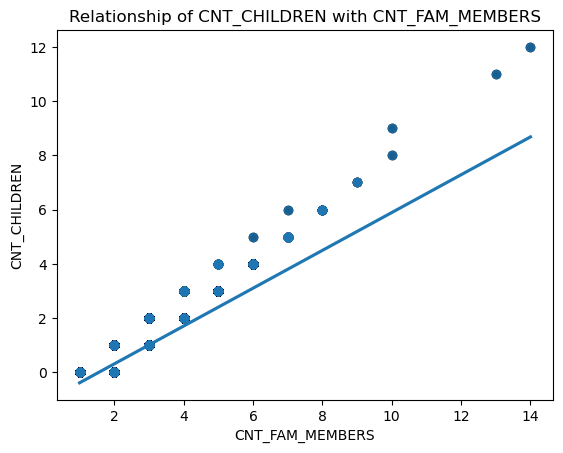

In [54]:
plt.scatter(x=data['CNT_FAM_MEMBERS'], y=data['CNT_CHILDREN'], color='k')
sns.regplot(x=data['CNT_FAM_MEMBERS'], y=data['CNT_CHILDREN'])
plt.title('Relationship of CNT_CHILDREN with CNT_FAM_MEMBERS')
plt.show()

__Interpretation :__   
The positive Co-relation represent by Graph.   
When Family members are increasing then Children count is also increasing.    
If family count is high then there are more chances of Children count is also high.   
Dependent count is more then there are more chances for Disapproved the loan of clients.

#### Level 3: Multivariate Analysis

1. Multivariate for Non-defaulters.

In [68]:
M1 = data[(data['NAME_CONTRACT_TYPE'] == 'Cash loans') &
          (data['NAME_INCOME_TYPE'] == 'Working') &
          (data['AMT_INCOME_TOTAL'] >= 100000) & (data['AMT_INCOME_TOTAL'] <= 150000) &
          (data['DAYS_EMPLOYED'] >= 500) & (data['DAYS_EMPLOYED'] <= 1000) &
          (data['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') &
          (data['House'] == 'Y') &
          (data['Car'] == 'N') &
          (data['TOTAL_DOC_SUBMITTED'] == 1)]
M1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
102,100121,0,Cash loans,M,N,Y,0,126000.0,787131.0,679500.0,...,669,1,1,1,1,0,Low-skill Laborers,2.0,FRIDAY,1
517,100596,0,Cash loans,F,N,Y,0,117000.0,599778.0,477000.0,...,749,1,1,0,1,1,Cooking staff,1.0,MONDAY,1
627,100717,1,Cash loans,M,N,Y,0,135000.0,284400.0,225000.0,...,908,1,1,1,1,1,High skill tech staff,2.0,FRIDAY,1
810,100927,0,Cash loans,F,N,Y,0,135000.0,1350000.0,1350000.0,...,868,1,1,1,1,0,Sales staff,2.0,TUESDAY,1
833,100951,0,Cash loans,M,N,Y,0,112500.0,224136.0,198000.0,...,975,1,1,1,1,0,Low-skill Laborers,2.0,TUESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99349,215345,0,Cash loans,F,N,Y,1,135000.0,298512.0,270000.0,...,535,1,1,1,1,0,Laborers,2.0,TUESDAY,1
99431,215440,0,Cash loans,M,N,Y,1,112500.0,152820.0,135000.0,...,844,1,1,0,1,0,Drivers,3.0,SATURDAY,1
99660,215701,0,Cash loans,F,N,Y,1,112500.0,225000.0,225000.0,...,677,1,1,0,1,0,Sales staff,2.0,SATURDAY,1
99731,215780,0,Cash loans,F,N,Y,0,110250.0,555273.0,463500.0,...,984,1,1,0,1,0,Accountants,1.0,THURSDAY,1


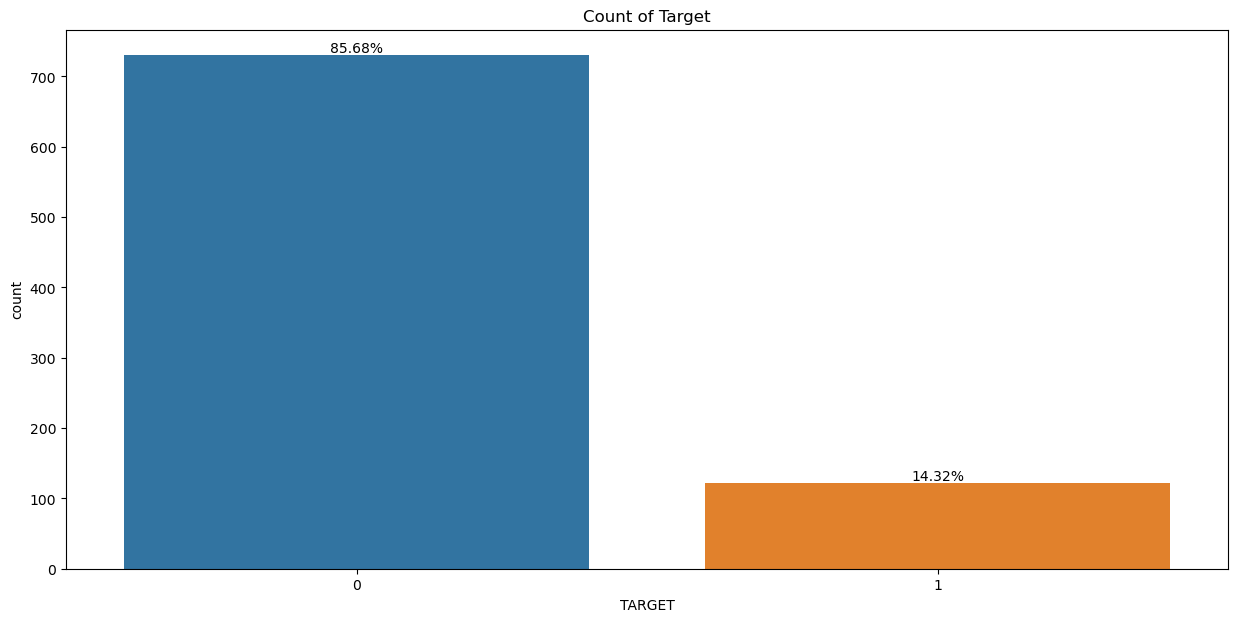

In [69]:
fig, ax = plt.subplots(figsize= (15, 7))
ax = sns.countplot(x = M1['TARGET'])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    ax.set_title("Count of Target")
    percentage = f"{round(bar.get_height() /len(M1)*100, 2)}%"      # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

__Interpretation :__   
1. Target 0 is the Non-defaulter clients.    
2. Most of clients or applications are under Non-defaulter.
3. There are 86% are the Non-defaulter clients by some Analysis.   

2. Multivariate for Defaulters.

In [108]:
M2 = data[(data['NAME_INCOME_TYPE'] == 'Working') &
          (data['NAME_FAMILY_STATUS'] == 'Married') &
          (data['OCCUPATION_TYPE'] == 'Laborers') &
          (data['DAYS_EMPLOYED'] > 500) & (data['DAYS_EMPLOYED'] <= 1000)]
M2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
52,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,454500.0,...,778,1,1,1,1,0,Laborers,2.0,TUESDAY,1
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,463500.0,...,892,1,1,0,1,0,Laborers,2.0,MONDAY,1
107,100126,0,Revolving loans,M,N,Y,2,135000.0,180000.0,180000.0,...,782,1,1,1,1,0,Laborers,4.0,FRIDAY,0
200,100233,0,Cash loans,F,N,Y,0,216000.0,679671.0,607500.0,...,701,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
209,100243,0,Cash loans,M,N,Y,0,112500.0,161730.0,135000.0,...,573,1,1,1,1,0,Laborers,2.0,SUNDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702,215748,1,Cash loans,M,Y,Y,1,225000.0,857169.0,715500.0,...,661,1,1,0,1,0,Laborers,3.0,FRIDAY,1
99741,215790,0,Revolving loans,F,Y,Y,0,157500.0,270000.0,270000.0,...,734,1,1,0,1,0,Laborers,2.0,FRIDAY,0
99795,215850,0,Cash loans,M,N,Y,3,180000.0,927252.0,774000.0,...,827,1,1,0,1,0,Laborers,5.0,THURSDAY,2
99825,215886,0,Cash loans,F,Y,Y,2,99000.0,562491.0,454500.0,...,603,1,1,0,1,0,Laborers,4.0,THURSDAY,1


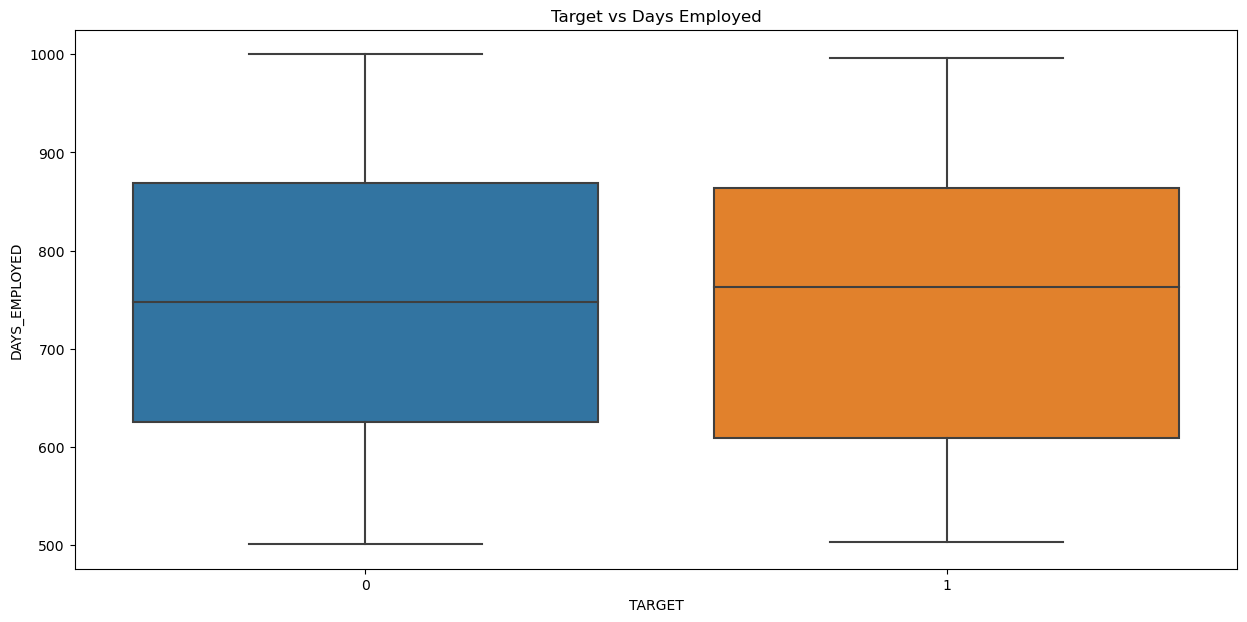

In [109]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Target vs Days Employed')
sns.boxplot(x = M2['TARGET'], y = M2['DAYS_EMPLOYED'])
plt.show()

__Interpretation :__   
1. Target 1 means Defaulter clients have more Spread than Non-defaulter clients. 
2. Many applications come from Defaulter clients.
3. So, directly can reject the loan application of Defaulter clients.

3. Multivariate for 50-50 Chances.

In [114]:
M3 = data[(data['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') &
          (data['NAME_INCOME_TYPE'] ==  'Working') &
          (data['AMT_INCOME_TOTAL'] >= 100000) & (data['AMT_INCOME_TOTAL'] <= 150000) &
          (data['DAYS_EMPLOYED'] > 500) & (data['DAYS_EMPLOYED'] <= 1000) &
          (data['House'] == 'Y') &
          (data['Car'] == 'N')]
M3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
102,100121,0,Cash loans,M,N,Y,0,126000.0,787131.0,679500.0,...,669,1,1,1,1,0,Low-skill Laborers,2.0,FRIDAY,1
107,100126,0,Revolving loans,M,N,Y,2,135000.0,180000.0,180000.0,...,782,1,1,1,1,0,Laborers,4.0,FRIDAY,0
517,100596,0,Cash loans,F,N,Y,0,117000.0,599778.0,477000.0,...,749,1,1,0,1,1,Cooking staff,1.0,MONDAY,1
579,100665,0,Revolving loans,F,N,Y,2,112500.0,270000.0,270000.0,...,504,1,1,0,1,0,Cooking staff,4.0,SATURDAY,0
627,100717,1,Cash loans,M,N,Y,0,135000.0,284400.0,225000.0,...,908,1,1,1,1,1,High skill tech staff,2.0,FRIDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99431,215440,0,Cash loans,M,N,Y,1,112500.0,152820.0,135000.0,...,844,1,1,0,1,0,Drivers,3.0,SATURDAY,1
99589,215622,0,Revolving loans,F,N,Y,0,135000.0,270000.0,270000.0,...,866,1,1,0,1,0,Drivers,1.0,FRIDAY,0
99660,215701,0,Cash loans,F,N,Y,1,112500.0,225000.0,225000.0,...,677,1,1,0,1,0,Sales staff,2.0,SATURDAY,1
99731,215780,0,Cash loans,F,N,Y,0,110250.0,555273.0,463500.0,...,984,1,1,0,1,0,Accountants,1.0,THURSDAY,1


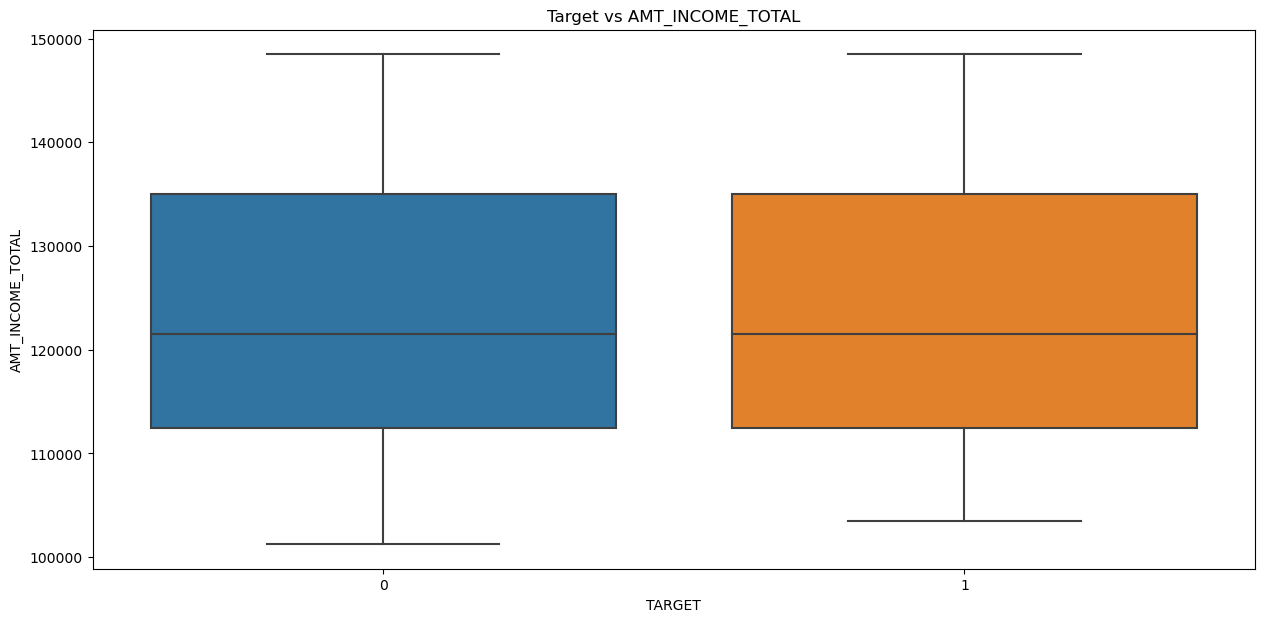

In [115]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Target vs AMT_INCOME_TOTAL')
sns.boxplot(x = M3['TARGET'], y = M3['AMT_INCOME_TOTAL'])
plt.show()

__Interpretation :__   
1. Both Target 0 and 1 means Non-defaulter and Defaulter clients have same Spread.
2. This is the 50-50 Chance to approve the loan.
3. Some clients are Defaulter and Some are Non-defaulters.
4. There is the same spread for both.